# IMPORTING TENSORFLOW


In [50]:
!pip install onednn-cpu-gomp


Defaulting to user installation because normal site-packages is not writeable


In [51]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


# IMPORTING TENSORFLOW

In [93]:
import tensorflow as tf

# USING CPU


In [94]:
device = "/device:CPU:0"

In [95]:
cd u116670

[Errno 2] No such file or directory: 'u116670'
/home/u116670


# DATA IMPORTING 

In [96]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Object_Detection/Data"

classes = os.listdir(dir_example)
print(classes)

['Test', '.ipynb_checkpoints', 'Train']


In [97]:
import os

dir_example = "Object_Detection/Data/Train"

train_classes = [d for d in os.listdir(dir_example) if d != '.ipynb_checkpoints']
print(train_classes)


['Laptop', 'Mobile', 'Bottle']


# DATA VISUALIZATION

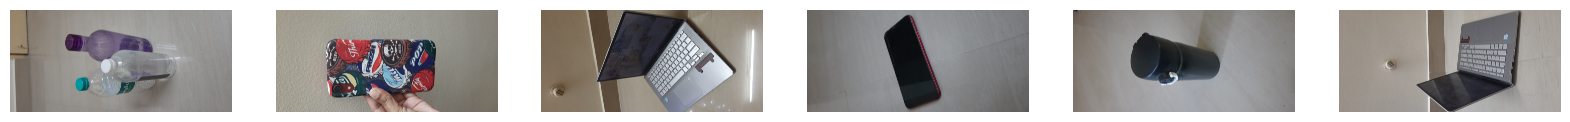

In [98]:
dir_with_examples = 'Object_Detection/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [99]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [100]:
train = 'Object_Detection/Data/Train'
test = 'Object_Detection/Data/Test'

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "Object_Detection/Data/Train"

# List all the classes excluding '.ipynb_checkpoints'
train_classes = [d for d in os.listdir(train_data_dir) if d != '.ipynb_checkpoints']

train_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow_from_directory(train_data_dir,
                                                      target_size=(300, 300),
                                                      batch_size=32,
                                                      class_mode='sparse',
                                                      classes=train_classes)  # Specify the classes

labels = train_generator.class_indices
print(labels, '\n')

labels = {v: k for k, v in labels.items()}
print(labels)


Found 136 images belonging to 3 classes.
{'Laptop': 0, 'Mobile': 1, 'Bottle': 2} 

{0: 'Laptop', 1: 'Mobile', 2: 'Bottle'}


In [102]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = "Object_Detection/Data/Test"

# List all the classes excluding '.ipynb_checkpoints'
test_classes = [d for d in os.listdir(test_data_dir) if d != '.ipynb_checkpoints']

test_generator = ImageDataGenerator(rescale=1/255)

test_generator = test_generator.flow_from_directory(test_data_dir,
                                                    target_size=(300, 300),
                                                    batch_size=32,
                                                    class_mode='sparse',
                                                    classes=test_classes)  # Specify the classes

test_labels = test_generator.class_indices
print(test_labels, '\n')

test_labels = {v: k for k, v in test_labels.items()}
print(test_labels)


Found 15 images belonging to 3 classes.
{'Laptop': 0, 'Mobile': 1, 'Bottle': 2} 

{0: 'Laptop', 1: 'Mobile', 2: 'Bottle'}


# Importing oneDNN 

In [104]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'


os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'



# LABELING 

In [105]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'Laptop': 0, 'Mobile': 1, 'Bottle': 2}


# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [106]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





# COMPILING MODEL  # Enable OneDNN optimizations

In [107]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 32)      

# TRAINING THE MODEL(10 EPOCHS)

In [121]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=50//10)

/tmp/ipykernel_335652/1860577046.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 0.4048 - accuracy: 0.8897
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.2981 - accuracy: 0.8824
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.2936 - accuracy: 0.8824
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 0.1775 - accuracy: 0.9412
Epoch 5/10
5/5 [==============================] - 8s 1s/step - loss: 0.1267 - accuracy: 0.9632
Epoch 6/10
5/5 [==============================] - 8s 1s/step - loss: 0.1085 - accuracy: 0.9559
Epoch 7/10
5/5 [==============================] - 7s 2s/step - loss: 0.1514 - accuracy: 0.9485
Epoch 8/10
5/5 [==============================] - 7s 1s/step - loss: 0.0676 - accuracy: 0.9853
Epoch 9/10
5/5 [==============================] - 7s 2s/step - loss: 0.1844 - accuracy: 0.9485
Epoch 10/10
5/5 [==============================] - 7s 2s/step - loss: 0.1576 - accuracy: 0.9485


# TESTING PREDICTION 

In [122]:
import keras.utils as ku
import numpy as np

In [123]:
from tensorflow.keras.preprocessing.image import load_img


Probability: 0.7085594
Classified: Mobile 



Text(0.5, 1.0, 'Loaded Image')

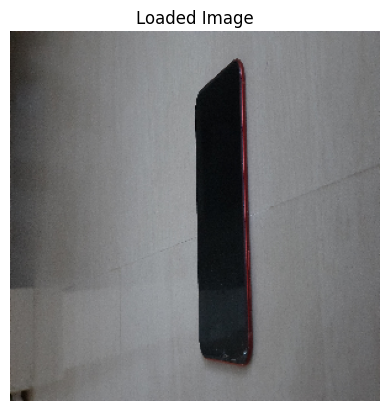

In [124]:
from keras.preprocessing import image


test_img = 'Object_Detection/Data/Test/Mobile/mobile1.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [125]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

LAPTOP : 25.76 %
MOBILE : 70.86 %
BOTTLE : 1.87 %


KeyError: 3

Probability: 0.9997036
Classified: Laptop 



Text(0.5, 1.0, 'Loaded Image')

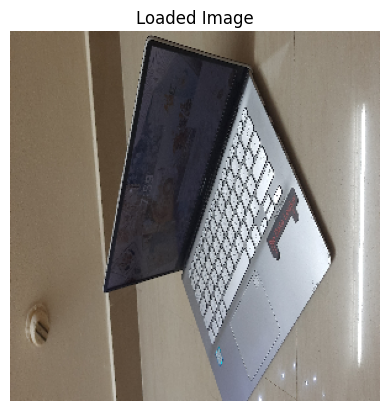

In [129]:
from keras.preprocessing import image

test_img = 'Object_Detection/Data/Test/Laptop/laptop2.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [127]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

LAPTOP : 22.91 %
MOBILE : 77.05 %
BOTTLE : 0.03 %


KeyError: 3

Probability: 0.98872674
Classified: Bottle 



Text(0.5, 1.0, 'Loaded Image')

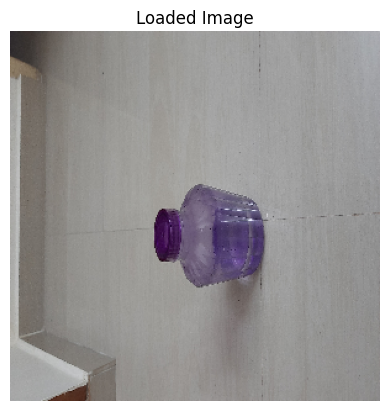

In [128]:
from keras.preprocessing import image

test_img = 'Object_Detection/Data/Test/Bottle/bottle1.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [56]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.95 %
GLASS : 9.72 %
METAL : 4.58 %
PAPER : 2.33 %
PLASTIC : 81.36 %
TRASH : 0.08 %


Probability: 0.892966
Classified: Bottle 



Text(0.5, 1.0, 'Loaded Image')

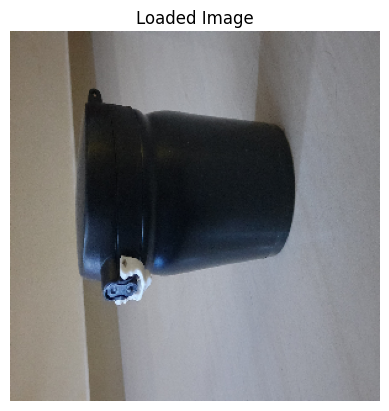

In [130]:
from keras.preprocessing import image

test_img = 'Object_Detection/Data/Test/Bottle/bottle2.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [131]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

LAPTOP : 2.78 %
MOBILE : 3.68 %
BOTTLE : 89.3 %


KeyError: 3

# SAVING THE TRAINED MODEL

In [87]:
model.save('modelnew.h5')

In [89]:
pwd

'/home/u116670'

In [92]:
import tensorflow as tf

# Load the saved HDF5 model
model = tf.keras.models.load_model("/home/u116670/modelnew.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


2023-08-10 13:49:54.793605: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpydfxrr2t/assets


2023-08-10 13:49:55.546371: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-08-10 13:49:55.546393: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-08-10 13:49:55.546956: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpydfxrr2t
2023-08-10 13:49:55.548408: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-08-10 13:49:55.548422: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpydfxrr2t
2023-08-10 13:49:55.560763: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-08-10 13:49:55.620461: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpydfxrr2t
2023-08-10 13:49:55.634767: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 87811 m